<a href="https://colab.research.google.com/github/swarnim1/Customer_churn/blob/main/Custome_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,roc_curve,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras


In [ ]:
df = pd.read_csv('/content/churn.csv')

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.drop(columns=['customerID'],inplace=True)

df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


df['TotalCharges'].fillna(0, inplace=True)

<ipython-input-8-535a6ffde096>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
for i in df:
  print(f"{i} : {df[i].unique() }")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [ ]:
df = df.replace('No internet service' ,'No')
df = df.replace('No phone service' ,'No')

In [ ]:
label_encoded_list = []
for i in df:
  print(f"{i} : {df[i].unique() }")
  if(len(df[i].unique())==2):
    label_encoded_list.append(i)
print(label_encoded_list)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']
['gender', 'SeniorCitizen', 'Partner', 'Dependents',

In [ ]:
num_var = [i for i in df.describe() ]
cat_var =[i for i in df.columns if i not in num_var]

In [ ]:
df_encoded = pd.get_dummies(df , columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
encoder = LabelEncoder()
for i in label_encoded_list:
  df_encoded[i] = encoder.fit_transform(df_encoded[i])

In [ ]:
scaler = MinMaxScaler()
df_encoded[num_var] = scaler.fit_transform(df_encoded[num_var])

In [ ]:
df_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,1,0,0.013889,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0.0,0,0,0.472222,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0.0,0,0,0.027778,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0.0,0,0,0.625000,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0.0,0,0,0.027778,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,0.333333,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,0,0.0,1,1,1.000000,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,0,0.0,1,1,0.152778,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1.0,1,0,0.055556,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [ ]:
y = df_encoded['Churn']
x = df_encoded.drop(columns=['Churn'])

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
xtrain

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5950,1,0.0,0,1,0.013889,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1249,1,0.0,0,0,0.013889,1,0,0,0,0,...,True,False,False,True,False,False,False,False,False,True
1876,1,0.0,1,0,0.652778,1,1,0,0,0,...,False,True,False,False,True,False,False,True,False,False
6984,1,0.0,0,1,0.430556,0,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
1317,0,0.0,0,0,0.041667,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,1,0.0,0,0,0.791667,1,0,0,0,0,...,False,False,True,False,False,True,True,False,False,False
5703,1,1.0,0,0,1.000000,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False
2783,0,0.0,1,0,0.597222,1,1,1,1,0,...,False,True,False,True,False,False,False,False,True,False
280,0,0.0,0,0,0.083333,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True


In [ ]:
len(xtrain.columns)

26

In [ ]:

model = Sequential([
    Dense(20 ,input_shape = (len(xtrain.columns),) , activation='relu' ),
    Dense(8 ,activation='relu'),
    Dense(1 , activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [ ]:
model.fit(xtrain , ytrain , epochs=10,class_weight={0: 1, 1: 3})

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7596 - loss: 0.7063
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7577 - loss: 0.6952
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7593 - loss: 0.6806
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7673 - loss: 0.6639
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7612 - loss: 0.6901
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7586 - loss: 0.6948
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7663 - loss: 0.6811
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7543 - loss: 0.6921
Epoch 9/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7751 - loss: 0.6618
Epoch 10/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7672 - loss: 0.6697


In [ ]:
loss, accuracy = model.evaluate(xtest,ytest)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7877 - loss: 0.4611
Test Accuracy: 76.58%


In [ ]:
ypred = model.predict(xtest)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
ypred_final=[1 if value >0.3 else 0 for value in ypred ]

In [ ]:
cm = confusion_matrix(ytest , ypred_final)
cm

array([[606, 432],
       [ 43, 328]])

In [ ]:
precision,recall,_ = precision_recall_curve(ytest, ypred_final)

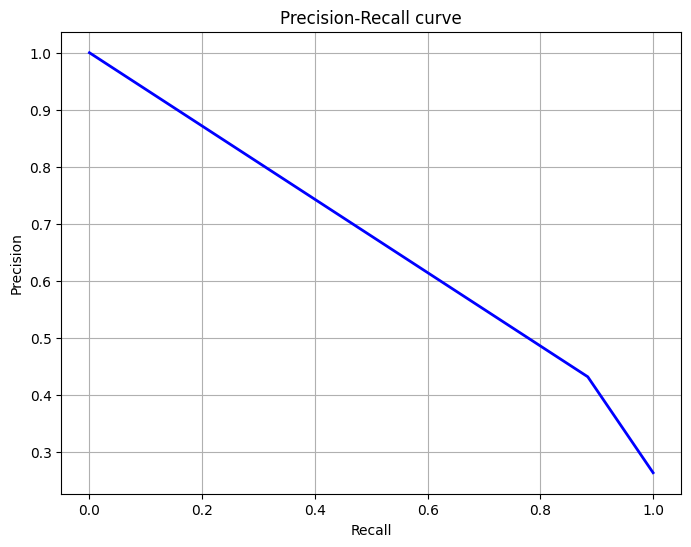

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.grid(True)
plt.show()